In [29]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

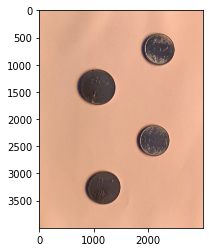

In [30]:
image = cv.imread('coins.jpg')
plt.imshow(image)

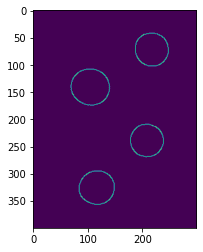

In [31]:
image = cv.resize(image.copy(), (0, 0), fx = 0.1, fy = 0.1)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (17,17), 0)
edges = cv.Canny(blur, 10, 80)
(height, width) = edges.shape[:2]
plt.imshow(edges)

In [32]:
thetas = np.deg2rad(np.arange(0, 360, 1))
cos_thetas = np.cos(thetas)
sin_thetas = np.sin(thetas)
radius = [i for i in range(32,24,-1)] 
num_radius = len(radius)
accumulator = np.zeros((height,width,num_radius),dtype=np.uint64)

In [33]:
y_i, x_i = np.nonzero(edges)
for r in range(num_radius):
  for y,x in zip(y_i,x_i):
    for theta_idx in range(len(thetas)):
      a = x - round(radius[r]*cos_thetas[theta_idx])
      b = y - round(radius[r]*sin_thetas[theta_idx])

      if a>=0 and b>=0 and a<width and b<height:
        accumulator[int(b)][int(a)][r] += 1
 

True

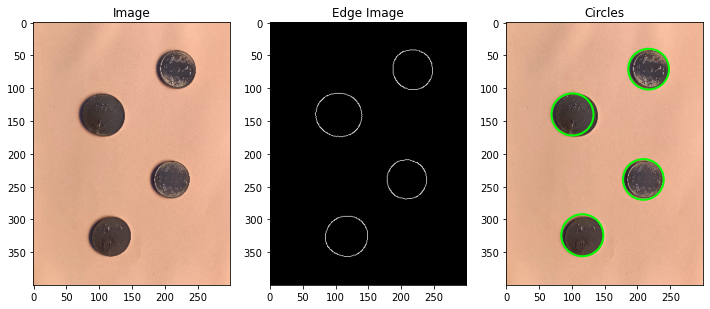

In [34]:
figure = plt.figure(figsize=(12, 12))
subplot1 = figure.add_subplot(1, 3, 1)
subplot1.imshow(image)
subplot1.title.set_text("Image")

subplot2 = figure.add_subplot(1, 3, 2)
subplot2.imshow(edges, cmap="gray")
subplot2.title.set_text("Edge Image")

result = image.copy()
subplot3 = figure.add_subplot(1, 3, 3)
subplot3.imshow(result)
subplot3.title.set_text("Circles")
for r in range(len(radius)):
  for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
      if accumulator[y][x][r] >= 120:
        cv.circle(result,(x,y),radius[r],(0,255,0),2)
        circ = Circle((x,y),radius[r],color=(0,1,0),fill=False,linewidth=2)
        subplot3.add_patch(circ)
        accumulator[y-radius[r]:y+radius[r],x-radius[r]:x+radius[r]] = 0
cv.imwrite('coins_result.jpg', result)